In [1]:
# Core Imports
import numpy as np
from utils.data import getClassifierData
from utils.reporter import ModelEvaluationHarness
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


# Implementation Specific Imports
from sklearn.linear_model import SGDClassifier as Classifier


In [2]:
preppedData, preppedTarget = getClassifierData()


accuracy :
 0.5970909090909091
precision :
 0.5590551181102362
recall :
 0.9222454355527295
f1 :
 0.6961261570106274
classificationReport :
               precision    recall  f1-score   support

       False       0.78      0.27      0.40     32973
        True       0.56      0.92      0.70     33027

    accuracy                           0.60     66000
   macro avg       0.67      0.60      0.55     66000
weighted avg       0.67      0.60      0.55     66000

confusionMatrix :
 [[ 8949 24024]
 [ 2568 30459]]
roc_curve :
 {'fpr': array([0.        , 0.72859612, 1.        ]), 'tpr': array([0.        , 0.92224544, 1.        ]), 'thresholds': array([inf,  1.,  0.])}
auc :
 0.596824655725596


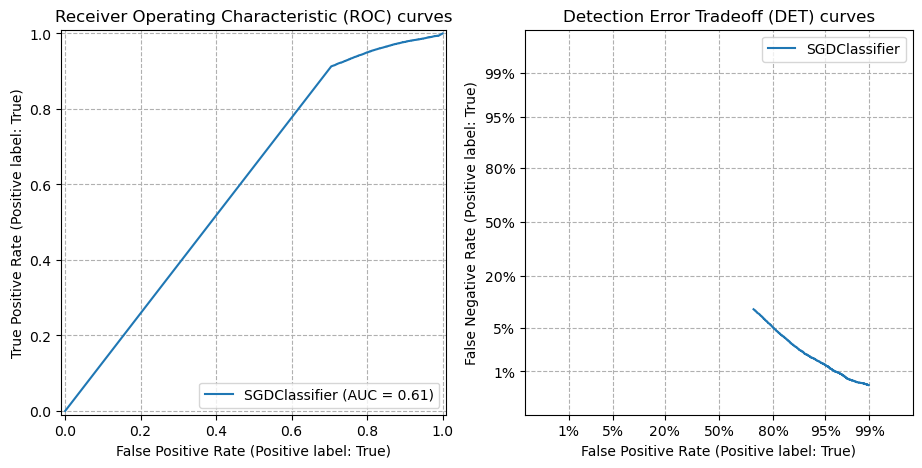

In [3]:
defaultModel = ModelEvaluationHarness(
    Classifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42),
    Classifier.__name__,
    preppedData,
    preppedTarget
    )

defaultModel.splitData()
defaultModel.train()
defaultModel.predict()
defaultModel.evaluate()
defaultModel.graphROC()
for valuation, value in defaultModel.evaluation.items():
    print(valuation ,':\n', value)

In [ ]:
param_bounds= {
            'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
            'penalty': ['l2', 'l1', 'elasticnet', None],
            'fit_intercept': [True, False],
            'shuffle': [True, False],
            'learning_rate': ['constant', 'optimal', 'invscaling','adaptive'],
            'early_stopping': [True, False],
            'warm_start': [True, False],
            'max_iter': range(1000,5000,1000)
        }


"""Identify Optimal Configuration"""
search = HalvingRandomSearchCV(Classifier(), param_bounds)
search = search.fit(preppedData, preppedTarget)


"""Harness Classifier with Optimal Configuration"""
tuned_evaluator = ModelEvaluationHarness(
    Classifier(**search.best_estimator_.get_params()),
    Classifier.__name__,
    preppedData,
    preppedTarget
)

"""Evaluate Model"""
tuned_evaluator.splitData()
tuned_evaluator.train()
tuned_evaluator.predict()
tuned_evaluator.evaluate()
tuned_evaluator.graphROC()
for valuation, value in tuned_evaluator.evaluation.items():
    print(valuation ,':\n', value)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9216 is smaller than n_iter=10000. Running 9216 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/s